In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

You will use a Rock dataset where you will use 19 different rock features to predict the rock category. The data you need are included in these two files: 1) aggregateRockData.xlsx Download aggregateRockData.xlsxyou will only use 2nd column that contains the rock category number (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary) - that will be the label.

In [2]:
labels_df = pd.read_excel("/content/aggregateRockData-1.xlsx", usecols=[1],header=None,names=["Label"])

In [3]:
labels_df.head()

,Label
0,1
1,1
2,1
3,1
4,1


In [4]:
labels_df.shape

(540, 1)

In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   540 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB


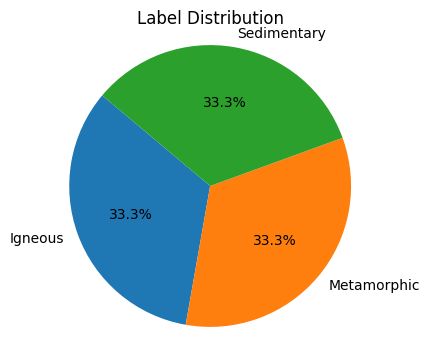

In [ ]:
import matplotlib.pyplot as plt
# Count the occurrences of each label
label_counts = labels_df.value_counts()

# Create a pie chart to visualize the label distribution
plt.figure(figsize=(4,4))
plt.pie(label_counts, labels=["Igneous", "Metamorphic", "Sedimentary"], autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

From above we can conclude that we have equal samples of each type of rocks

2) norm540.txt  Download norm540.txtyou will only use columns 4 to 22 - those will be the attributes (features).

In [5]:
# Load the data without a header, and explicitly specify column names
column_names = [f"Feature_{i-2}" for i in range(3, 22)]
features_df = pd.read_csv("/content/norm540.txt",delimiter="\t", usecols=list(range(3, 22)), header=None, names=column_names)


In [ ]:
features_df.head().T

,0,1,2,3,4
Feature_1,1.690468,1.690468,1.665576,2.233118,2.213204
Feature_2,-0.159688,-0.159688,-0.407623,-0.407623,-0.159688
Feature_3,-0.646115,-0.530724,0.858984,-0.415333,1.129901
Feature_4,-0.252007,0.127922,-0.631936,-0.424702,-0.044773
Feature_5,-0.609794,-0.482150,-0.443857,-1.120369,-1.082076
Feature_6,0.579927,2.865772,2.611790,0.071962,1.341876
Feature_7,0.375313,0.375313,-0.405184,4.017633,3.757467
Feature_8,-0.352386,-0.352386,-0.352386,-0.352386,-0.352386
Feature_9,-0.260224,-0.260224,-0.260224,-0.260224,-0.260224
Feature_10,-0.759128,-0.529150,-0.529150,-0.529150,-0.759128


In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   540 non-null    float64
 1   Feature_2   540 non-null    float64
 2   Feature_3   540 non-null    float64
 3   Feature_4   540 non-null    float64
 4   Feature_5   540 non-null    float64
 5   Feature_6   540 non-null    float64
 6   Feature_7   540 non-null    float64
 7   Feature_8   540 non-null    float64
 8   Feature_9   540 non-null    float64
 9   Feature_10  540 non-null    float64
 10  Feature_11  540 non-null    float64
 11  Feature_12  540 non-null    float64
 12  Feature_13  540 non-null    float64
 13  Feature_14  540 non-null    float64
 14  Feature_15  540 non-null    float64
 15  Feature_16  540 non-null    float64
 16  Feature_17  540 non-null    float64
 17  Feature_18  540 non-null    float64
 18  Feature_19  540 non-null    float64
dtypes: float64(19)
memory usage: 

In [ ]:
features_df.shape

(540, 19)

1.Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? [2 points]

In [ ]:
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature_1,540.0,-1.851852e-09,1.0,-1.321491,-0.823647,-0.300910,0.764477,2.422299
Feature_2,540.0,9.629630e-08,1.0,-0.407623,-0.407623,-0.407623,-0.159688,4.551072
Feature_3,540.0,5.370370e-08,1.0,-1.187950,-0.761505,-0.375197,0.584303,2.750390
Feature_4,540.0,-6.296296e-08,1.0,-1.322715,-0.804631,-0.182929,0.576929,4.175892
Feature_5,540.0,-4.074074e-08,1.0,-1.248012,-0.699145,-0.271538,0.357107,3.813059
Feature_6,540.0,-1.537037e-07,1.0,-0.436004,-0.436004,-0.436004,-0.182021,4.643652
Feature_7,540.0,-1.666667e-08,1.0,-0.405184,-0.405184,-0.405184,-0.145018,4.798130
Feature_8,540.0,-1.814815e-07,1.0,-0.352386,-0.352386,-0.352386,-0.352386,4.888957
Feature_9,540.0,-1.481481e-08,1.0,-0.260224,-0.260224,-0.260224,-0.260224,5.862693
Feature_10,540.0,-1.166667e-07,1.0,-0.759128,-0.759128,-0.299173,0.390760,3.610446


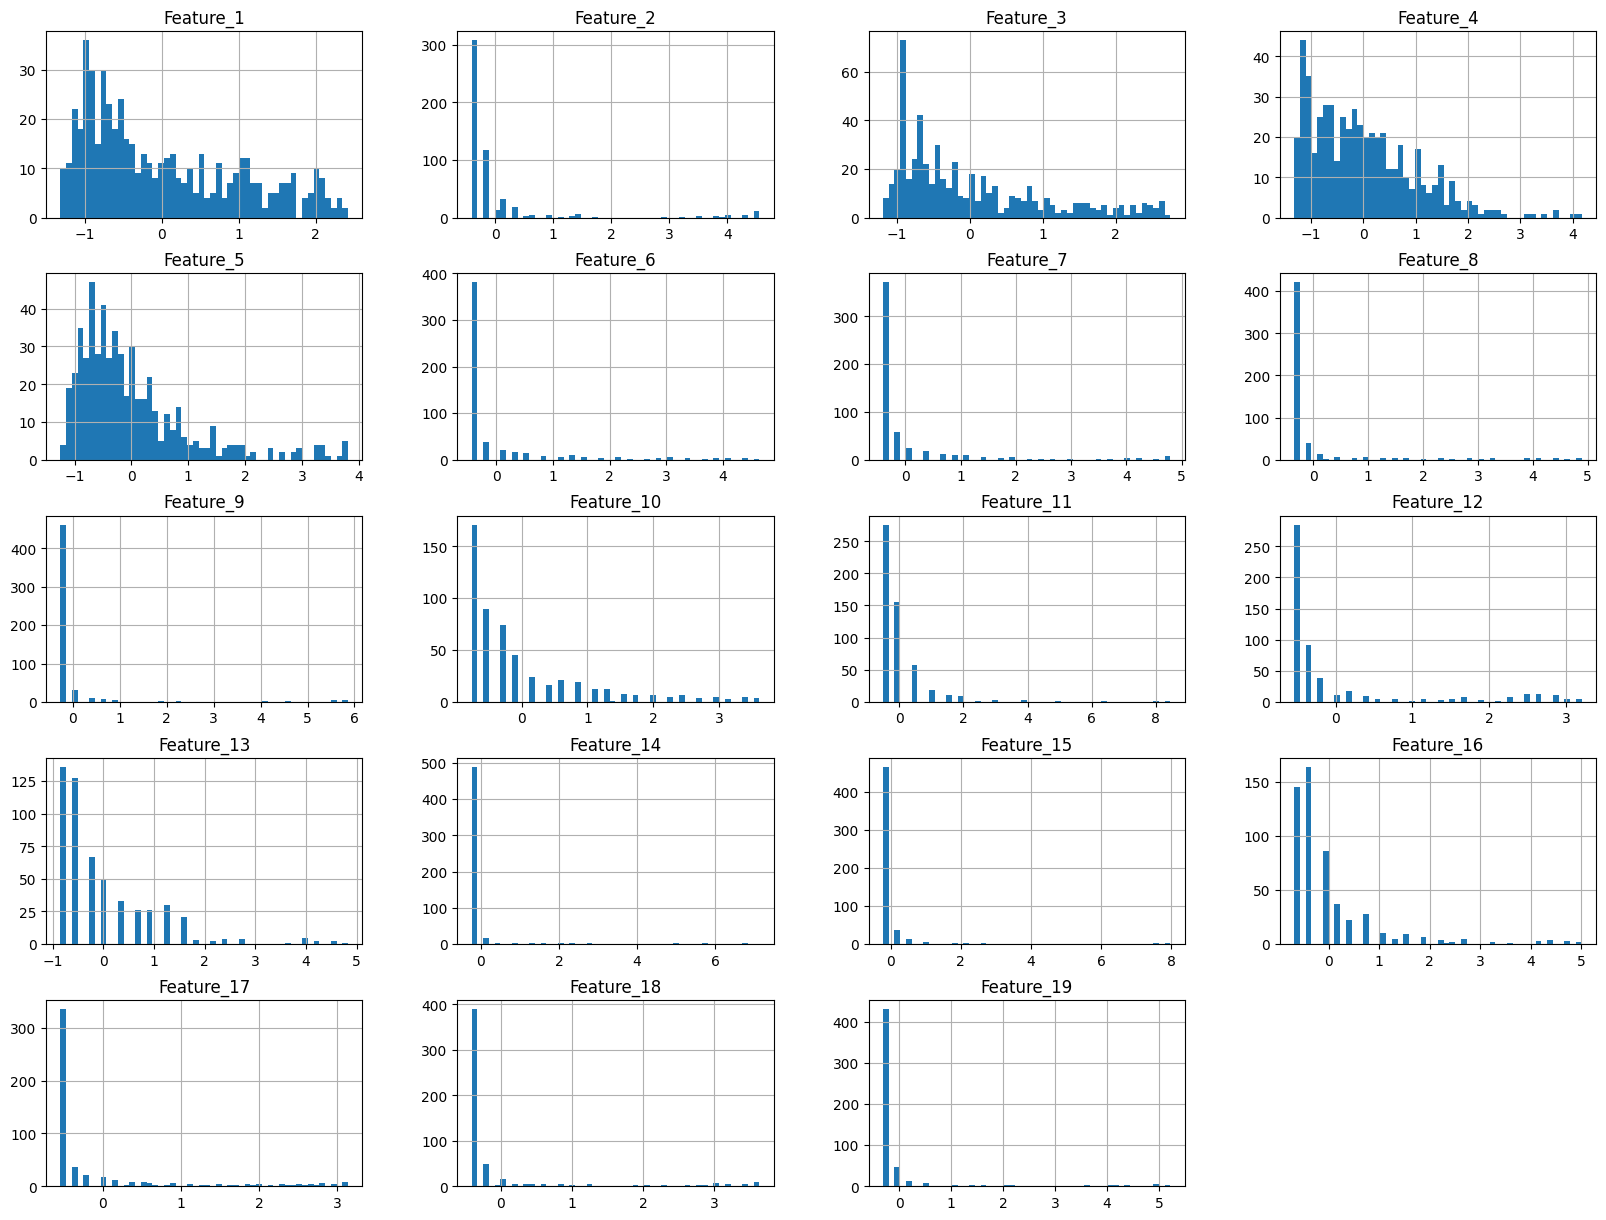

In [ ]:
#visualization of the distributions for each attribute
features_df.hist(bins=50, figsize=(20,15))
plt.title('Distribution of each feature')
plt.show()

In [ ]:
features_df["Feature_13"].value_counts()

-0.846887    136
-0.547986    127
-0.249084     67
 0.049817     50
 0.348718     33
 1.245422     30
 0.946521     26
 0.647619     26
 1.544323     21
 3.935533      5
 2.441027      4
 2.739928      4
 1.843224      3
 4.234434      2
 4.533336      2
 2.142126      2
 4.832237      1
 3.636632      1
Name: Feature_13, dtype: int64

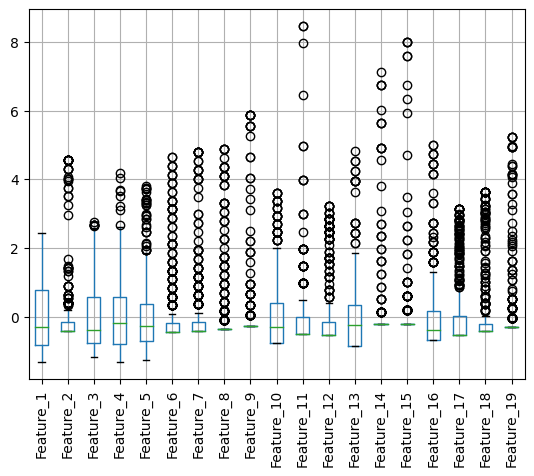

In [ ]:
# Check for outliers
features_df.boxplot(rot = 90)
plt.show()

#analysis: dont know if these are features that are needed or not

In [ ]:
features_df.isnull().sum()

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
dtype: int64

Observations for Q2:

1.   There are no null values in the dataset
2.   Looking at the histogram it looks like the values binned and features have skewness



Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]

In [7]:
# Concatenate labels and features into one DataFrame
df = pd.concat([labels_df, features_df], axis=1)

In [ ]:
df.head()

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
0,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,1,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,1,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [ ]:
df.shape

(540, 20)

In [10]:
corr_matrix = df.corr()
corr_matrix["Label"].sort_values(ascending=False)

Label         1.000000
Feature_10    0.262855
Feature_19    0.258386
Feature_14    0.253550
Feature_16    0.132240
Feature_11    0.130094
Feature_15    0.121163
Feature_5     0.103781
Feature_8     0.086923
Feature_18    0.061825
Feature_7     0.009450
Feature_12    0.007679
Feature_9    -0.016680
Feature_17   -0.068022
Feature_3    -0.104748
Feature_6    -0.123388
Feature_4    -0.164925
Feature_13   -0.242921
Feature_2    -0.301462
Feature_1    -0.305296
Name: Label, dtype: float64



1.   Feature_10 has the highest positive correlation with the label
2.   Features such as Feature_10, Feature_19, and Feature_14 are positively correlated with the target variable, with Feature_10 having the highest positive correlation.
3. Several other features, including Feature_16, Feature_11, Feature_15, Feature_5, and Feature_8, also exhibit positive correlations with the target, although these correlations are weaker than the top three features.
4. Some features, like Feature_18 and Feature_7, have very weak positive correlations with the target. Feature_12 shows an extremely weak positive correlation, and Feature_9 has a slightly negative but still weak correlation.
5. A group of features, including Feature_17, Feature_3, Feature_6, Feature_4, Feature_13, Feature_2, and Feature_1, exhibit negative correlations with the target. Feature_1 and Feature_2 have the highest negative correlations.



<Axes: >

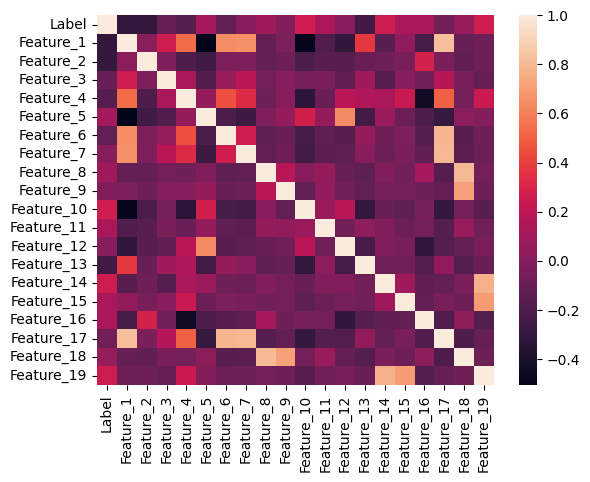

In [11]:
import seaborn as sns
sns.heatmap(corr_matrix)

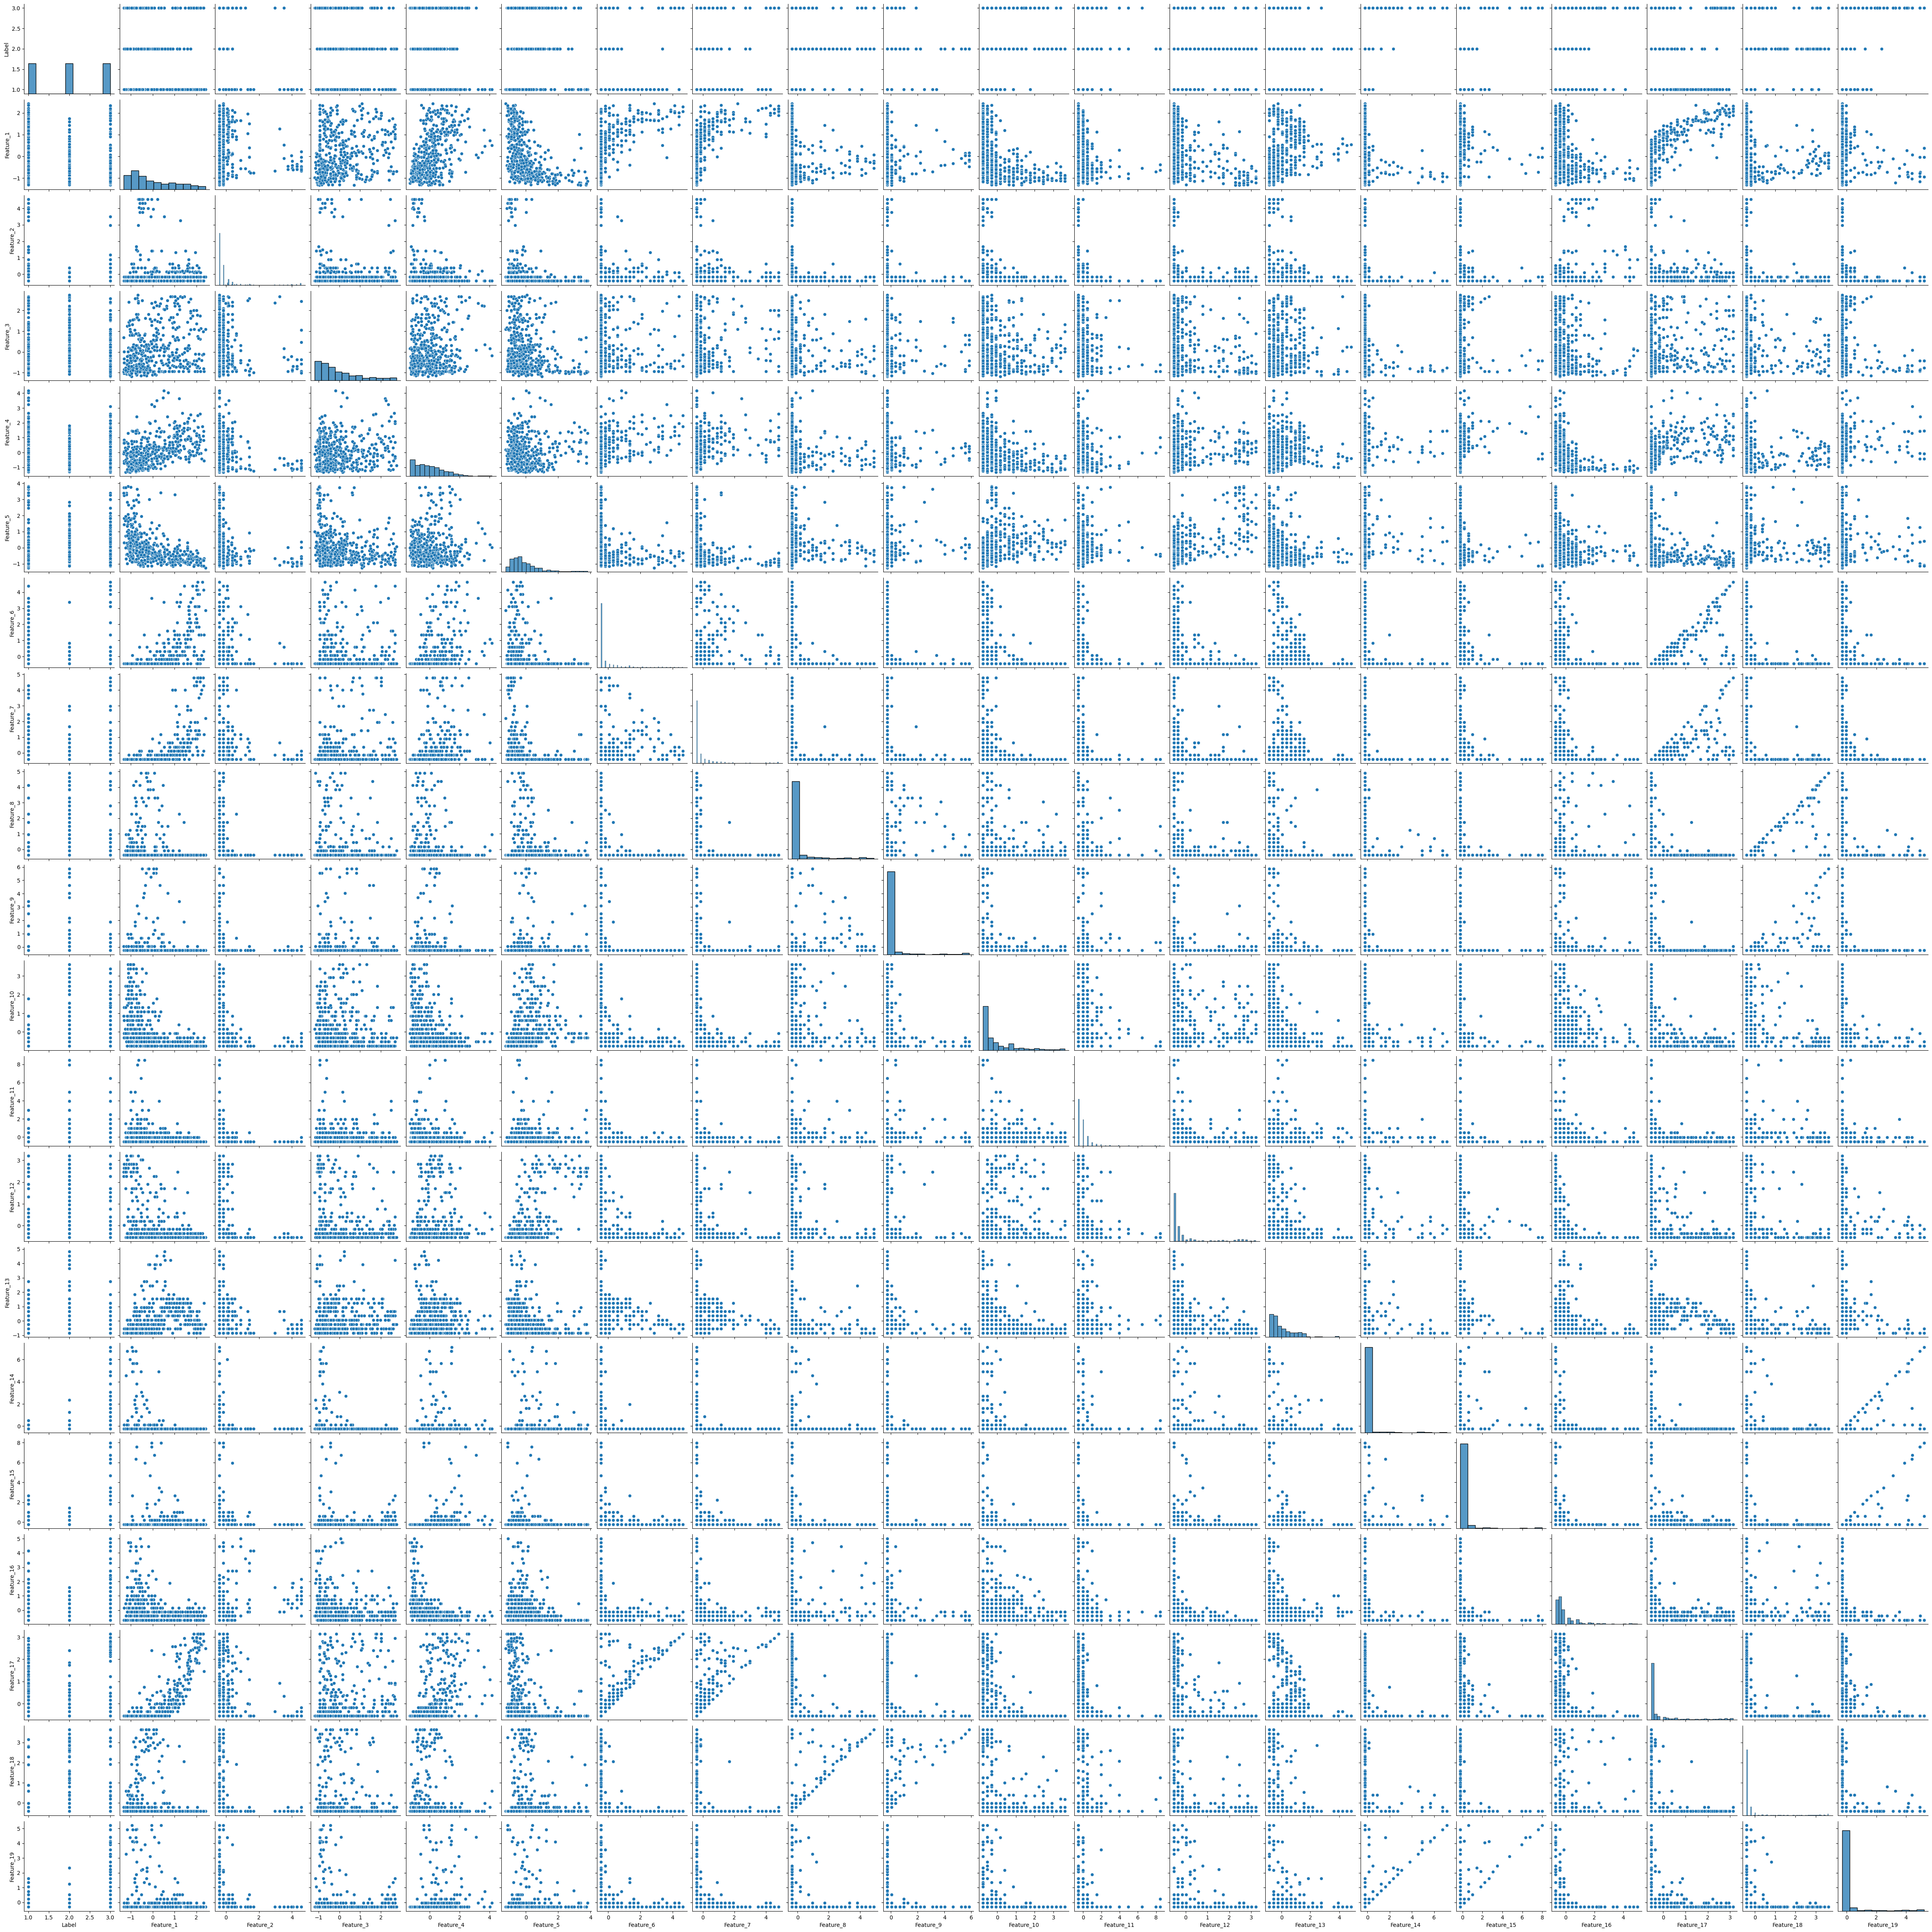

In [12]:
sns.pairplot(data=df)

1. positive linear trends in the scatterplots between the target variable and Feature_10, Feature_19, and Feature_14.
2. Features like Feature_16, Feature_11, Feature_15, Feature_5, and Feature_8, you might observe less pronounced upward-sloping trends in the scatterplots, indicating weaker positive correlations.
3. Feature_1,Feature_3,Feature_4 and Feature_5 looks highly correlated with each other

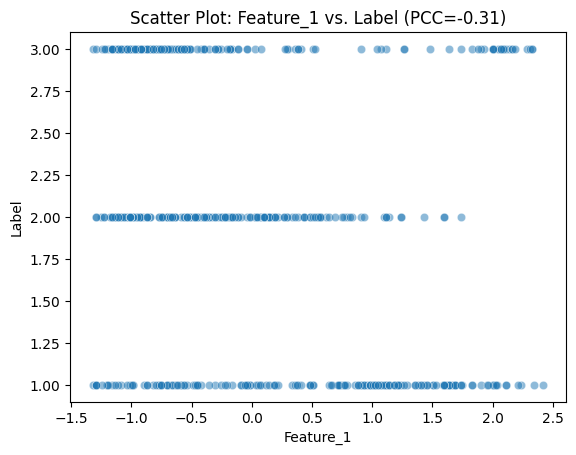

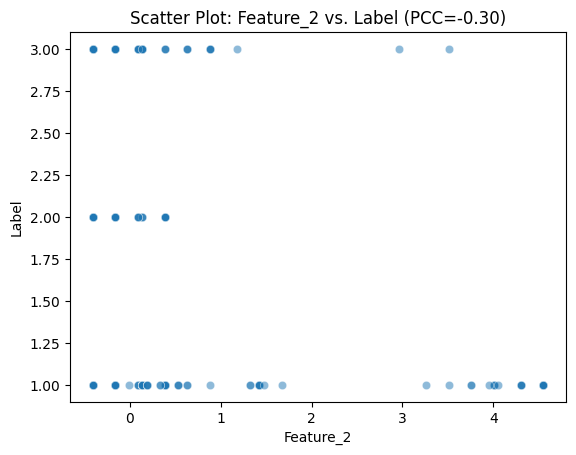

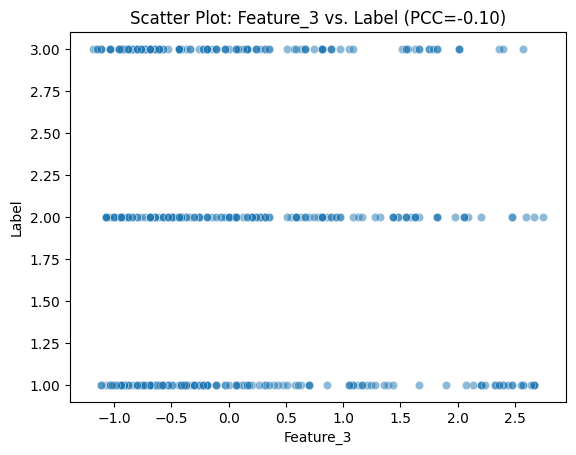

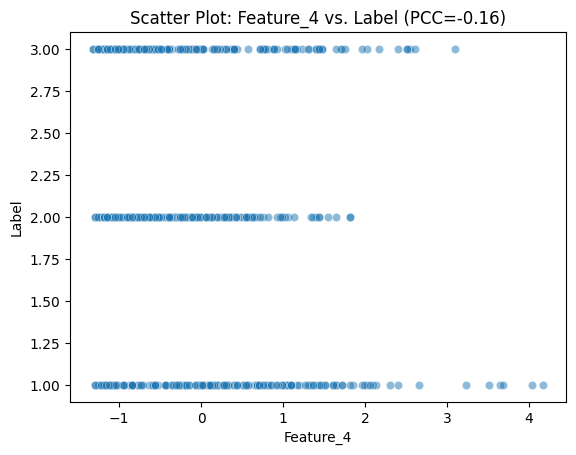

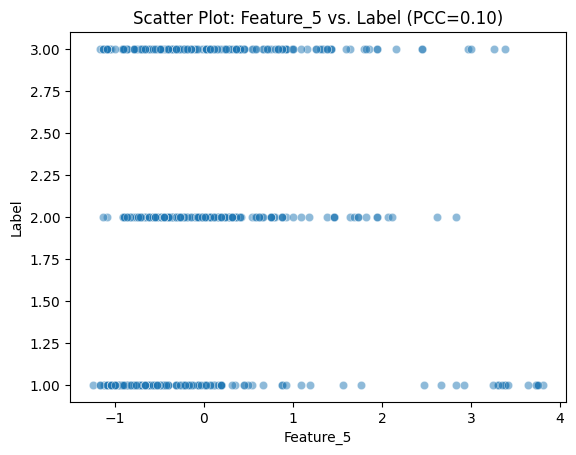

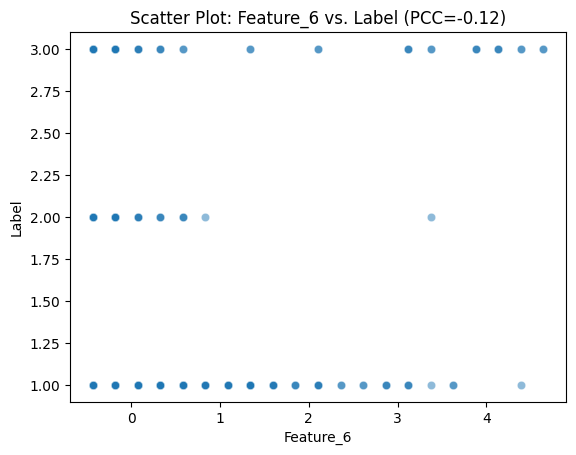

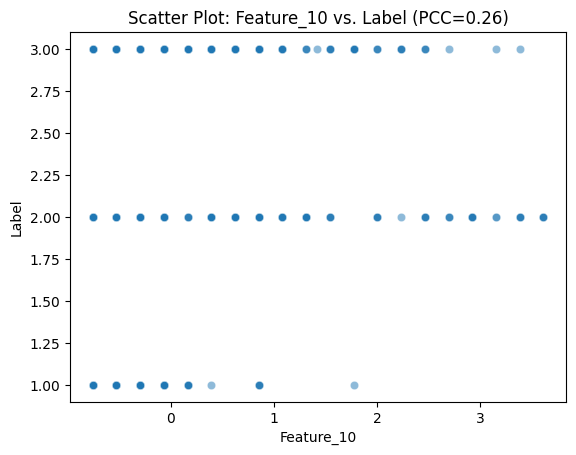

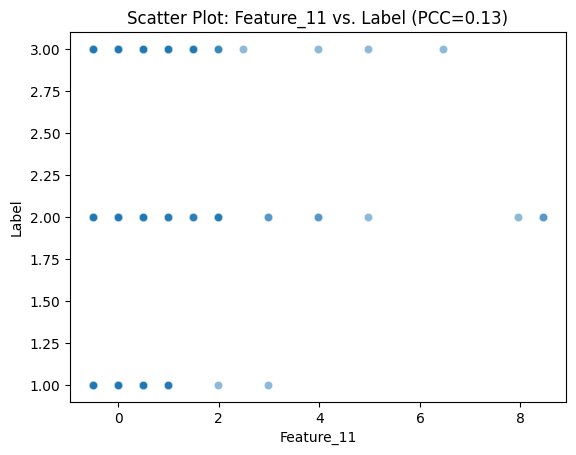

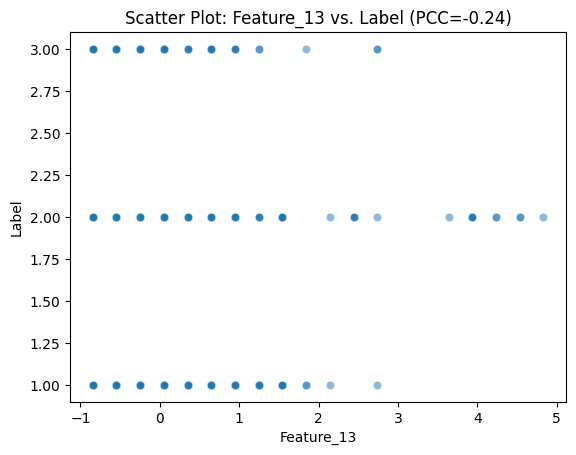

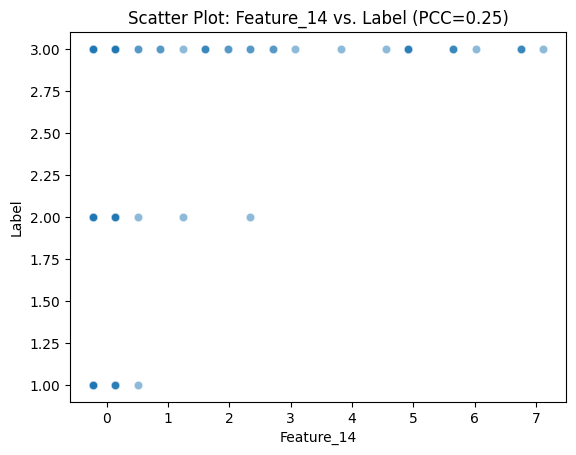

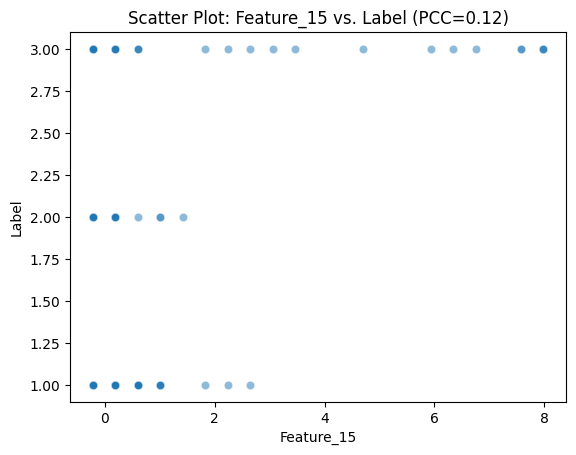

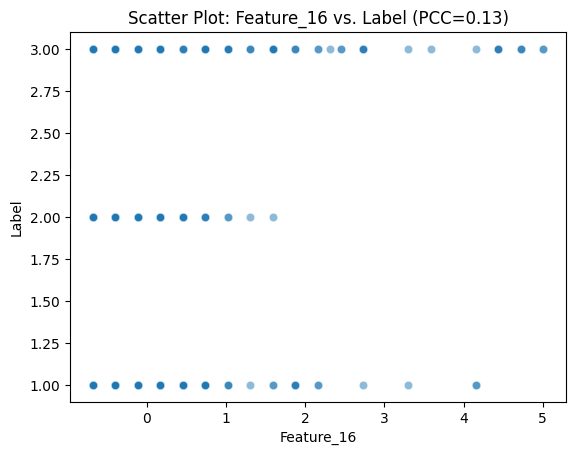

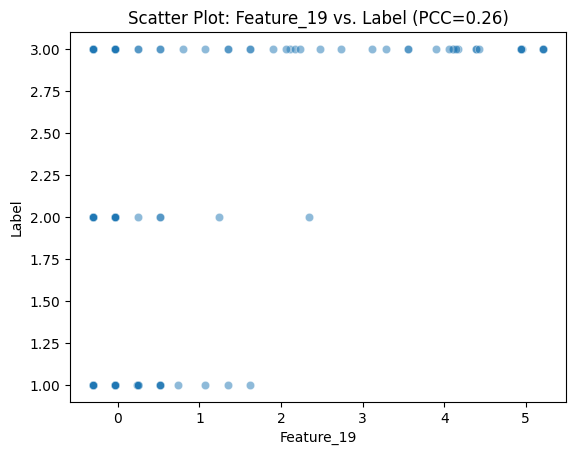

In [ ]:
# Generate Scatter Plots for attributes with significant correlations
significant_corr_threshold = 0.1  # Adjust as needed
for column in column_names:
    pcc_with_label = corr_matrix.loc["Label", column]
    if abs(pcc_with_label) >= significant_corr_threshold:
        sns.scatterplot(data=df, x=column, y="Label", marker="o", alpha=0.5)
        plt.title(f"Scatter Plot: {column} vs. Label (PCC={pcc_with_label:.2f})")
        plt.xlabel(column)
        plt.ylabel("Label")
        plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Randomly shuffle the entire dataset
shuffled_df = df.sample(frac=1, random_state=42)

Are there any attributes that might require special treatment? :
1. use stratified sampling
using stratified sampleing worsned the scores of all models ,hence revereted it back

2. Did not correct skewness for features as correcting for just one/single feature may lead to manipulation of dataset

In [17]:
# Split into training, validation, and testing sets
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

In [18]:
# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=42)

#further dividing the train set to train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 20% validation


In [19]:
# Checking class balance in the training, validation, and testing sets
train_class_distribution = y_train["Label"].value_counts(normalize=True)
validation_class_distribution = y_val["Label"].value_counts(normalize=True)
test_class_distribution = y_test["Label"].value_counts(normalize=True)

print("Class distribution in training set:")
print(train_class_distribution)
print("Shape of train:",y_train.shape)

print("\nClass distribution in validation set:")
print(validation_class_distribution)
print("Shape of validation:",y_val.shape)

print("\nClass distribution in testing set:")
print(test_class_distribution)
print("Shape of test:",y_test.shape)

Class distribution in training set:
3    0.367284
2    0.339506
1    0.293210
Name: Label, dtype: float64
Shape of train: (324, 1)

Class distribution in validation set:
2    0.388889
1    0.361111
3    0.250000
Name: Label, dtype: float64
Shape of validation: (108, 1)

Class distribution in testing set:
1    0.425926
3    0.314815
2    0.259259
Name: Label, dtype: float64
Shape of test: (108, 1)


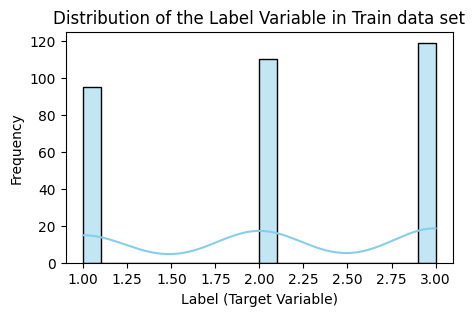

In [ ]:
#Plot the distribution of both sets to see the distribution
#methode 2
plt.figure(figsize=(5, 3))
sns.histplot(y_train["Label"], bins=20, kde=True, color='skyblue')
plt.xlabel('Label (Target Variable)')
plt.ylabel('Frequency')
plt.title('Distribution of the Label Variable in Train data set')
plt.show()

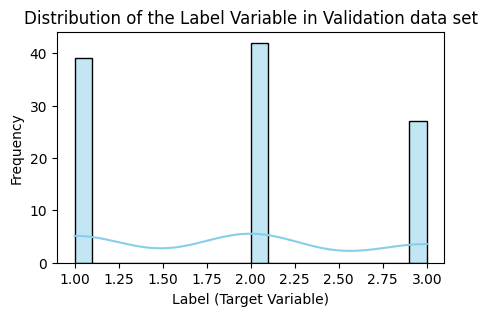

In [ ]:
#Plot the distribution of both sets to see the distribution
#methode 2
plt.figure(figsize=(5, 3))
sns.histplot(y_val["Label"], bins=20, kde=True, color='skyblue')
plt.xlabel('Label (Target Variable)')
plt.ylabel('Frequency')
plt.title('Distribution of the Label Variable in Validation data set')
plt.show()

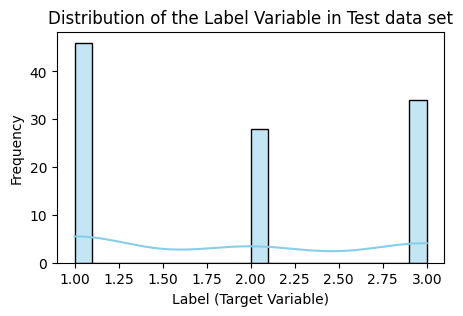

In [ ]:
#Plot the distribution of both sets to see the distribution
#methode 2
plt.figure(figsize=(5, 3))
sns.histplot(y_test["Label"], bins=20, kde=True, color='skyblue')
plt.xlabel('Label (Target Variable)')
plt.ylabel('Frequency')
plt.title('Distribution of the Label Variable in Test data set')
plt.show()

In [ ]:
#mean of the dataset
#to verify if the test portion representative of the entire data set
#methode 1
test_mean = X_test.mean()
df_mean = df.mean()
Val_mean = X_val.mean()
train_mean = X_train.mean()

In [ ]:
from tabulate import tabulate

# table with mean comparison
table1 = [["", "Testing", "Entire Dataset", "Validation","Train"],
         ["Mean", f"{test_mean}", f"{df_mean}", f"{Val_mean}",f"{train_mean}"]]

# Print the table
print(tabulate(table1, headers="firstrow", tablefmt="fancy_grid"))

╒══════╤════════════════════════╤════════════════════════════╤════════════════════════╤════════════════════════╕
│      │ Testing                │ Entire Dataset             │ Validation             │ Train                  │
╞══════╪════════════════════════╪════════════════════════════╪════════════════════════╪════════════════════════╡
│ Mean │ Feature_1     0.246719 │ Label         2.000000e+00 │ Feature_1    -0.127264 │ Feature_1    -0.039818 │
│      │ Feature_2     0.126814 │ Feature_1    -1.851852e-09 │ Feature_2    -0.009550 │ Feature_2    -0.039088 │
│      │ Feature_3    -0.057872 │ Feature_2     9.629630e-08 │ Feature_3     0.062164 │ Feature_3    -0.001431 │
│      │ Feature_4     0.087563 │ Feature_3     5.370370e-08 │ Feature_4    -0.037545 │ Feature_4    -0.016673 │
│      │ Feature_5    -0.018910 │ Feature_4    -6.296296e-08 │ Feature_5     0.049639 │ Feature_5    -0.010243 │
│      │ Feature_6     0.071962 │ Feature_5    -4.074074e-08 │ Feature_6    -0.113822 │ Feature_

In [ ]:
ytest_mean = y_test.mean()
ydf_mean = df.mean()
yVal_mean = y_val.mean()
ytrain_mean = y_train.mean()
# table with performance metrics
table2 = [["", "Testing", "Entire DS", "Validation","Train"],
         ["Mean", f"{ytest_mean}", f"{df_mean[0]}", f"{yVal_mean}",f"{ytrain_mean}"]]

# Print the table
print(tabulate(table2, headers="firstrow", tablefmt="fancy_grid"))

╒══════╤═══════════════════╤═════════════╤═══════════════════╤═══════════════════╕
│      │ Testing           │   Entire DS │ Validation        │ Train             │
╞══════╪═══════════════════╪═════════════╪═══════════════════╪═══════════════════╡
│ Mean │ Label    1.888889 │           2 │ Label    1.888889 │ Label    2.074074 │
│      │ dtype: float64    │             │ dtype: float64    │ dtype: float64    │
╘══════╧═══════════════════╧═════════════╧═══════════════════╧═══════════════════╛


Since the mean of all the data sets are almost same we can conclude that test and validation portions of the data are representative of the entire dataset.<br>
Method 1: Plot of distribution of both the test,validation and entire dat set. the distribution is much similar which can infer that test set is representation of data set<br>
Method 2: The mean values of both test portion,validation and entire data set difference is very less/negligible which can account that test set is representation of data set


Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):<br>
1.Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]<br>
2.Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]<br>
3.Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]

In [64]:
from sklearn.preprocessing import StandardScaler #To take care of very high outliers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

predicted=[]

In [21]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

1.Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]

In [22]:
# Define a range of hyperparameters to explore using grid search
param_grid_MLR = {
    'C': [0.1,1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Optimization solver
    'max_iter': [500,1000,2000],  # Maximum number of iterations
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression(multi_class='multinomial', random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid_MLR, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [500, 1000, 2000],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=1)

In [65]:
# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print('Best parameter:',best_params)
# Train the model with the best hyperparameters
best_model = LogisticRegression(
    multi_class='multinomial',
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    random_state=42
)
best_model.fit(X_train, y_train)

Best parameter: {'C': 1, 'max_iter': 500, 'solver': 'newton-cg'}


LogisticRegression(C=1, max_iter=500, multi_class='multinomial',
                   random_state=42, solver='newton-cg')

In [66]:
# Predictions on training, validation, and test sets
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

In [67]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
val_accuracy, val_precision, val_recall, val_f1 = evaluate_model(y_val, y_val_pred)
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

In [26]:
# Report the performance
print("Best Hyperparameters:", best_params)
print("\nTraining Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nValidation Performance:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'solver': 'newton-cg'}

Training Performance:
Accuracy: 0.7346
Precision: 0.7346
Recall: 0.7346
F1 Score: 0.7346

Validation Performance:
Accuracy: 0.6759
Precision: 0.7046
Recall: 0.6759
F1 Score: 0.6784

Testing Performance:
Accuracy: 0.7407
Precision: 0.7440
Recall: 0.7407
F1 Score: 0.7417


In [68]:
from tabulate import tabulate

# table with performance metrics
table = [["Metric", "Training", "Validation", "Testing"],
         ["Accuracy", f"{train_accuracy:.4f}", f"{val_accuracy:.4f}", f"{test_accuracy:.4f}"],
         ["Precision", f"{train_precision:.4f}", f"{val_precision:.4f}", f"{test_precision:.4f}"],
         ["Recall", f"{train_recall:.4f}", f"{val_recall:.4f}", f"{test_recall:.4f}"],
         ["F1 Score", f"{train_f1:.4f}", f"{val_f1:.4f}", f"{test_f1:.4f}"]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
predicted.append(test_accuracy)

╒═══════════╤════════════╤══════════════╤═══════════╕
│ Metric    │   Training │   Validation │   Testing │
╞═══════════╪════════════╪══════════════╪═══════════╡
│ Accuracy  │     0.7346 │       0.6759 │    0.7407 │
├───────────┼────────────┼──────────────┼───────────┤
│ Precision │     0.7346 │       0.7046 │    0.744  │
├───────────┼────────────┼──────────────┼───────────┤
│ Recall    │     0.7346 │       0.6759 │    0.7407 │
├───────────┼────────────┼──────────────┼───────────┤
│ F1 Score  │     0.7346 │       0.6784 │    0.7417 │
╘═══════════╧════════════╧══════════════╧═══════════╛


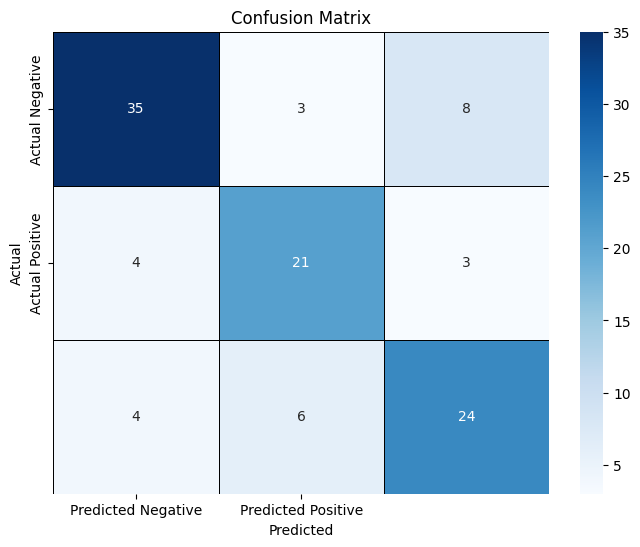

In [33]:
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Summary for Multinomial Logistic Regression Model
1. The training performance metrics are all consistent at 0.7346, which suggests that the model is performing consistently on the training dataset. it appears that the model is not significantly overfitting or underfitting. The model's training and testing accuracies are reasonably close, which is a positive sign. However, the drop in accuracy on the validation dataset suggests some degree of underfitting or a lack of strong generalization to new, unseen data.
2. The validation performance shows slightly lower accuracy and F1 Score compared to the training set, which is expected since the model needs to generalize to data it hasn't seen during training. The precision is higher than recall, indicating that the model is more conservative in making positive predictions.
3. The testing performance is quite similar to the training performance, suggesting that the model generalizes well to unseen data. The accuracy and F1 Score are both around 0.74, indicating that the model performs reasonably well on the test dataset.
4. To make sure the model is softmax reg we have only included 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'] and not 'liblinear' as it doesnt support it.

2.Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma. [10 points]

In [34]:
from sklearn.svm import SVC
param_grid_SVC = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of polynomial kernel (for poly kernel)
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient (for rbf and poly kernels)
}

# Create the SVM model
svm_classifier = SVC(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_SVC = GridSearchCV(svm_classifier, param_grid_SVC, cv=5, n_jobs=-1, verbose=1)
grid_search_SVC.fit(X_train, y_train)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [70]:

# Get the best hyperparameters from grid search
best_params_SVC = grid_search_SVC.best_params_
print('Best Parameter:',best_params_SVC)
# Train the model with the best hyperparameters
best_model_SVC = SVC(
    C=best_params_SVC['C'],
    kernel=best_params_SVC['kernel'],
    degree=best_params_SVC['degree'],
    gamma=best_params_SVC['gamma'],
    random_state=42
)
best_model_SVC.fit(X_train, y_train)

# Predictions on training, validation, and test sets
y_train_pred = best_model_SVC.predict(X_train)
y_val_pred = best_model_SVC.predict(X_val)
y_test_pred = best_model_SVC.predict(X_test)

Best Parameter: {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [71]:
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
val_accuracy, val_precision, val_recall, val_f1 = evaluate_model(y_val, y_val_pred)
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

In [58]:
# Report the performance
print("Best Hyperparameters:", best_params)
print("\nTraining Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nValidation Performance:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'solver': 'newton-cg'}

Training Performance:
Accuracy: 0.8426
Precision: 0.8449
Recall: 0.8426
F1 Score: 0.8418

Validation Performance:
Accuracy: 0.7500
Precision: 0.7709
Recall: 0.7500
F1 Score: 0.7506

Testing Performance:
Accuracy: 0.8241
Precision: 0.8318
Recall: 0.8241
F1 Score: 0.8263


In [72]:
table = [["Metric", "Training", "Validation", "Testing"],
         ["Accuracy", f"{train_accuracy:.4f}", f"{val_accuracy:.4f}", f"{test_accuracy:.4f}"],
         ["Precision", f"{train_precision:.4f}", f"{val_precision:.4f}", f"{test_precision:.4f}"],
         ["Recall", f"{train_recall:.4f}", f"{val_recall:.4f}", f"{test_recall:.4f}"],
         ["F1 Score", f"{train_f1:.4f}", f"{val_f1:.4f}", f"{test_f1:.4f}"]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
predicted.append(test_accuracy)

╒═══════════╤════════════╤══════════════╤═══════════╕
│ Metric    │   Training │   Validation │   Testing │
╞═══════════╪════════════╪══════════════╪═══════════╡
│ Accuracy  │     0.8426 │       0.75   │    0.8241 │
├───────────┼────────────┼──────────────┼───────────┤
│ Precision │     0.8449 │       0.7709 │    0.8318 │
├───────────┼────────────┼──────────────┼───────────┤
│ Recall    │     0.8426 │       0.75   │    0.8241 │
├───────────┼────────────┼──────────────┼───────────┤
│ F1 Score  │     0.8418 │       0.7506 │    0.8263 │
╘═══════════╧════════════╧══════════════╧═══════════╛


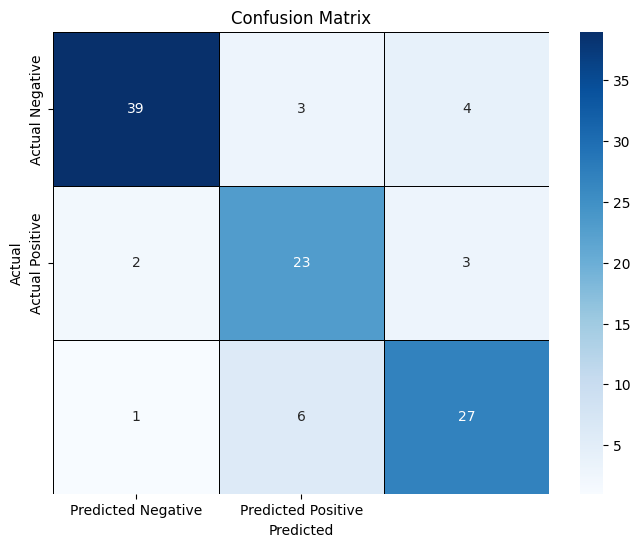

In [39]:
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Summary for SVM classifier
1. The training performance metrics are consistent, with accuracy, precision, recall, and F1 score all around 0.8426. This suggests that the model fits the training data well.However, the drop in accuracy on the validation dataset suggests some degree of underfitting or a lack of strong generalization to new, unseen data.
2. The validation performance shows slightly lower results compared to the training set, which is expected as the model should generalize to unseen data. However, the model maintains reasonable performance on the validation dataset, with accuracy, precision, recall, and F1 score all around 0.75.
3. The testing performance is quite similar to the training performance, suggesting that the model generalizes well to unseen data. The accuracy, precision, recall, and F1 score are all around 0.82, indicating a good performance on the test dataset.

3.Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Define a range of hyperparameters to explore using grid search
param_grid_RF = {
    'n_estimators': [20,30],  # Number of trees in the forest
    'max_depth': [None,5,10,20],  # Maximum depth of each tree
    'min_samples_split': [ 2, 3, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5,8],  # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_RF = GridSearchCV(random_forest, param_grid_RF, cv=5, n_jobs=-1, verbose=1)
grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [5, 8],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [20, 30]},
             verbose=1)

In [74]:
# Get the best hyperparameters from grid search
best_params_RF = grid_search_RF.best_params_
print('bestParameter',best_params_RF)
# Train the model with the best hyperparameters
best_model_RF = RandomForestClassifier(
    n_estimators=best_params_RF['n_estimators'],
    max_depth=best_params_RF['max_depth'],
    min_samples_split=best_params_RF['min_samples_split'],
    min_samples_leaf=best_params_RF['min_samples_leaf'],
    random_state=42
)
best_model_RF.fit(X_train, y_train)

# Predictions on training, validation, and test sets
y_train_pred = best_model_RF.predict(X_train)
y_val_pred = best_model_RF.predict(X_val)
y_test_pred = best_model_RF.predict(X_test)

bestParameter {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30}


bestParameter {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30}

In [75]:
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
val_accuracy, val_precision, val_recall, val_f1 = evaluate_model(y_val, y_val_pred)
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

In [43]:
# Report the performance
print("Best Hyperparameters:", best_params)
print("\nTraining Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nValidation Performance:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'solver': 'newton-cg'}

Training Performance:
Accuracy: 0.8765
Precision: 0.8794
Recall: 0.8765
F1 Score: 0.8758

Validation Performance:
Accuracy: 0.7130
Precision: 0.7191
Recall: 0.7130
F1 Score: 0.7115

Testing Performance:
Accuracy: 0.7685
Precision: 0.7874
Recall: 0.7685
F1 Score: 0.7709


In [76]:
table = [["Metric", "Training", "Validation", "Testing"],
         ["Accuracy", f"{train_accuracy:.4f}", f"{val_accuracy:.4f}", f"{test_accuracy:.4f}"],
         ["Precision", f"{train_precision:.4f}", f"{val_precision:.4f}", f"{test_precision:.4f}"],
         ["Recall", f"{train_recall:.4f}", f"{val_recall:.4f}", f"{test_recall:.4f}"],
         ["F1 Score", f"{train_f1:.4f}", f"{val_f1:.4f}", f"{test_f1:.4f}"]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
predicted.append(test_accuracy)

╒═══════════╤════════════╤══════════════╤═══════════╕
│ Metric    │   Training │   Validation │   Testing │
╞═══════════╪════════════╪══════════════╪═══════════╡
│ Accuracy  │     0.8765 │       0.713  │    0.7685 │
├───────────┼────────────┼──────────────┼───────────┤
│ Precision │     0.8794 │       0.7191 │    0.7874 │
├───────────┼────────────┼──────────────┼───────────┤
│ Recall    │     0.8765 │       0.713  │    0.7685 │
├───────────┼────────────┼──────────────┼───────────┤
│ F1 Score  │     0.8758 │       0.7115 │    0.7709 │
╘═══════════╧════════════╧══════════════╧═══════════╛


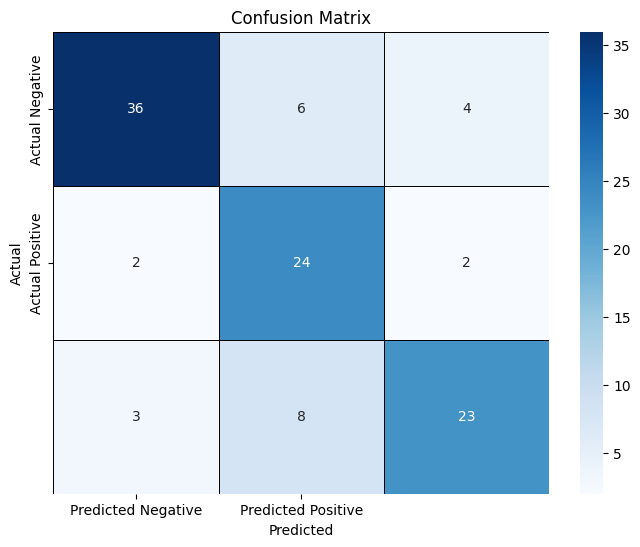

In [45]:
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Summary for RandomForest
1. The training performance metrics are consistent, with accuracy, precision, recall, and F1 score all around 0.8765. This suggests that the model fits the training data very well.
2. The validation performance shows slightly lower results compared to the training set, which is expected as the model should generalize to unseen data. However, the model maintains reasonable performance on the validation dataset, with accuracy, precision, recall, and F1 score all around 0.7130.
3. The testing performance is quite similar to the training performance, suggesting that the model generalizes well to unseen data. The accuracy, precision, recall, and F1 score are all around 0.7685, indicating good performance on the test dataset.Its overfitting as the test data is lesser than train data.

In [ ]:
#Feature Importance
for score, name in zip(best_model_RF.feature_importances_, features_df.columns):
    print(round(score, 2), name)

0.13 Feature_1
0.08 Feature_2
0.05 Feature_3
0.04 Feature_4
0.09 Feature_5
0.06 Feature_6
0.02 Feature_7
0.02 Feature_8
0.03 Feature_9
0.07 Feature_10
0.04 Feature_11
0.05 Feature_12
0.08 Feature_13
0.01 Feature_14
0.01 Feature_15
0.07 Feature_16
0.07 Feature_17
0.03 Feature_18
0.05 Feature_19


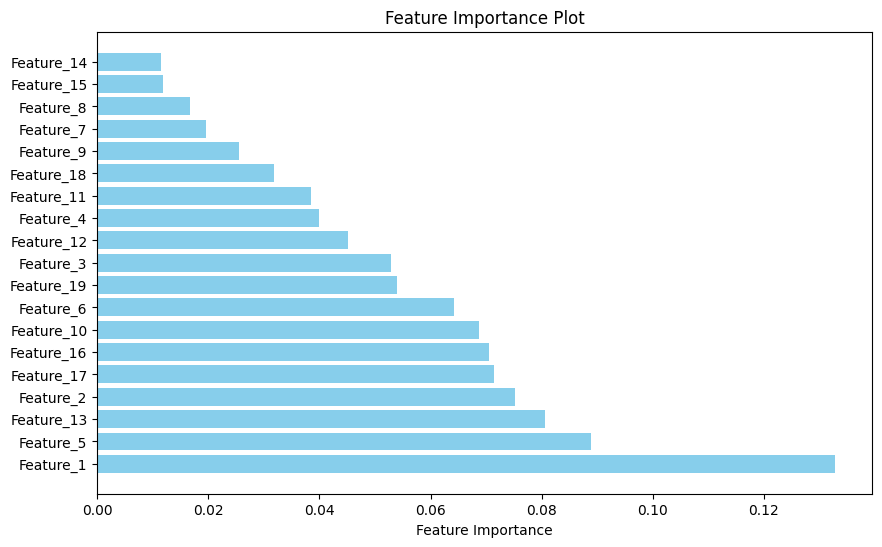

In [ ]:
feature_importances = [score for score, name in zip(best_model_RF.feature_importances_, features_df.columns)]
feature_names = features_df.columns

# Sort the feature importances and feature names
sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()

Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings. [10 points]

In [46]:
from sklearn.ensemble import VotingClassifier

#we will consider model with best parameteres form above
# Create a voting ensemble of classifiers
ensemble_classifier = VotingClassifier(
    estimators=[
        ('logistic_regression', best_model),
        ('svm', best_model_SVC),
        ('random_forest', best_model_RF)
    ],
    voting='hard'  # Use majority voting
)

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Predictions on validation set
y_val_ensemble_pred = ensemble_classifier.predict(X_val)

In [77]:
# Evaluate the ensemble on the validation set
val_accuracy_ensemble = accuracy_score(y_val, y_val_ensemble_pred)
val_precision_ensemble = precision_score(y_val, y_val_ensemble_pred, average='weighted')
val_recall_ensemble = recall_score(y_val, y_val_ensemble_pred, average='weighted')
val_f1_ensemble = f1_score(y_val, y_val_ensemble_pred, average='weighted')

# Report performance on the validation set
print("Ensemble Performance on Validation Set:")
print(f"Accuracy: {val_accuracy_ensemble:.4f}")
print(f"Precision: {val_precision_ensemble:.4f}")
print(f"Recall: {val_recall_ensemble:.4f}")
print(f"F1 Score: {val_f1_ensemble:.4f}")


Ensemble Performance on Validation Set:
Accuracy: 0.7500
Precision: 0.7656
Recall: 0.7500
F1 Score: 0.7485


In [78]:
# Predictions on test set
y_test_ensemble_pred = ensemble_classifier.predict(X_test)

# Evaluate the ensemble on the test set
test_accuracy_ensemble = accuracy_score(y_test, y_test_ensemble_pred)
test_precision_ensemble = precision_score(y_test, y_test_ensemble_pred, average='weighted')
test_recall_ensemble = recall_score(y_test, y_test_ensemble_pred, average='weighted')
test_f1_ensemble = f1_score(y_test, y_test_ensemble_pred, average='weighted')

# Report performance on the test set
print("\nEnsemble Performance on Test Set:")
print(f"Accuracy: {test_accuracy_ensemble:.4f}")
print(f"Precision: {test_precision_ensemble:.4f}")
print(f"Recall: {test_recall_ensemble:.4f}")
print(f"F1 Score: {test_f1_ensemble:.4f}")
predicted.append(test_accuracy_ensemble)


Ensemble Performance on Test Set:
Accuracy: 0.8148
Precision: 0.8232
Recall: 0.8148
F1 Score: 0.8162


In [49]:
table = [["Metric", "Validation", "Testing"],
         ["Accuracy",  f"{val_accuracy_ensemble:.4f}", f"{test_accuracy_ensemble:.4f}"],
         ["Precision",  f"{val_precision_ensemble:.4f}", f"{test_precision_ensemble:.4f}"],
         ["Recall",  f"{val_recall_ensemble:.4f}", f"{test_recall_ensemble:.4f}"],
         ["F1 Score",  f"{val_f1_ensemble:.4f}", f"{test_f1_ensemble:.4f}"]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═══════════╤══════════════╤═══════════╕
│ Metric    │   Validation │   Testing │
╞═══════════╪══════════════╪═══════════╡
│ Accuracy  │       0.75   │    0.8148 │
├───────────┼──────────────┼───────────┤
│ Precision │       0.7656 │    0.8232 │
├───────────┼──────────────┼───────────┤
│ Recall    │       0.75   │    0.8148 │
├───────────┼──────────────┼───────────┤
│ F1 Score  │       0.7485 │    0.8162 │
╘═══════════╧══════════════╧═══════════╛


The ensemble model appears to have good performance on the test set, with decent accuracy, precision, recall, and F1 score. An F1 score around 0.8162 is considered reasonably good for many classification tasks.<br>
Test Accuracy of approximately 81.48%. The ensemble model exhibited a high accuracy on the test data, indicating strong predictive performance.

<Axes: >

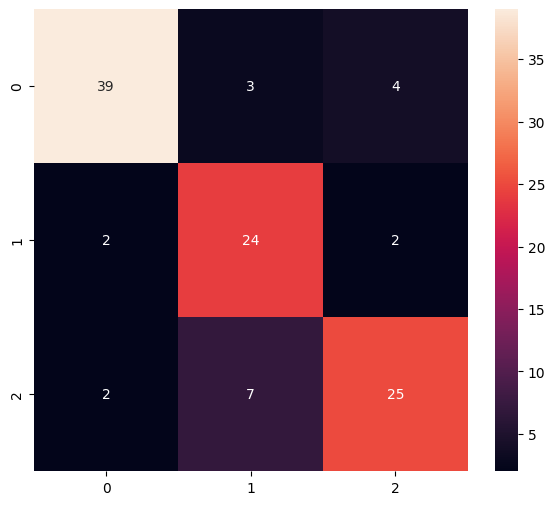

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_test_ensemble_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cf_matrix,annot=True,fmt='d')

In [79]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('logistic_regression', best_model),
        ('svm', best_model_SVC),
        ('random_forest', best_model_RF)
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

y_val_stacking_pred = ensemble_classifier.predict(X_val)

val_accuracy_ensemble = accuracy_score(y_val, y_val_stacking_pred)
val_precision_ensemble = precision_score(y_val, y_val_stacking_pred, average='weighted')
val_recall_ensemble = recall_score(y_val, y_val_stacking_pred, average='weighted')
val_f1_ensemble = f1_score(y_val, y_val_stacking_pred, average='weighted')

# Report performance on the validation set
print("Ensemble Performance on Validation Set:")
print(f"Accuracy: {val_accuracy_ensemble:.4f}")
print(f"Precision: {val_precision_ensemble:.4f}")
print(f"Recall: {val_recall_ensemble:.4f}")
print(f"F1 Score: {val_f1_ensemble:.4f}")

Ensemble Performance on Validation Set:
Accuracy: 0.7500
Precision: 0.7656
Recall: 0.7500
F1 Score: 0.7485


In [80]:
# Predictions on test set
y_test_stacking_pred = ensemble_classifier.predict(X_test)

# Evaluate the ensemble on the test set
test_accuracy_ensemble = accuracy_score(y_test, y_test_stacking_pred)
test_precision_ensemble = precision_score(y_test, y_test_stacking_pred, average='weighted')
test_recall_ensemble = recall_score(y_test, y_test_stacking_pred, average='weighted')
test_f1_ensemble = f1_score(y_test, y_test_stacking_pred, average='weighted')
predicted.append(test_accuracy_ensemble)
# Report performance on the test set
print("\nEnsemble Performance on Test Set:")
print(f"Accuracy: {test_accuracy_ensemble:.4f}")
print(f"Precision: {test_precision_ensemble:.4f}")
print(f"Recall: {test_recall_ensemble:.4f}")
print(f"F1 Score: {test_f1_ensemble:.4f}")


Ensemble Performance on Test Set:
Accuracy: 0.8148
Precision: 0.8232
Recall: 0.8148
F1 Score: 0.8162


In [81]:
table = [["Metric", "Validation", "Testing"],
         ["Accuracy",  f"{val_accuracy_ensemble:.4f}", f"{test_accuracy_ensemble:.4f}"],
         ["Precision",  f"{val_precision_ensemble:.4f}", f"{test_precision_ensemble:.4f}"],
         ["Recall",  f"{val_recall_ensemble:.4f}", f"{test_recall_ensemble:.4f}"],
         ["F1 Score",  f"{val_f1_ensemble:.4f}", f"{test_f1_ensemble:.4f}"]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═══════════╤══════════════╤═══════════╕
│ Metric    │   Validation │   Testing │
╞═══════════╪══════════════╪═══════════╡
│ Accuracy  │       0.75   │    0.8148 │
├───────────┼──────────────┼───────────┤
│ Precision │       0.7656 │    0.8232 │
├───────────┼──────────────┼───────────┤
│ Recall    │       0.75   │    0.8148 │
├───────────┼──────────────┼───────────┤
│ F1 Score  │       0.7485 │    0.8162 │
╘═══════════╧══════════════╧═══════════╛


In [82]:
predicted

[0.7407407407407407,
 0.8240740740740741,
 0.7685185185185185,
 0.8148148148148148,
 0.8148148148148148]

<Axes: title={'center': 'Accuracy of Models'}, xlabel='Accuracy', ylabel='Model'>

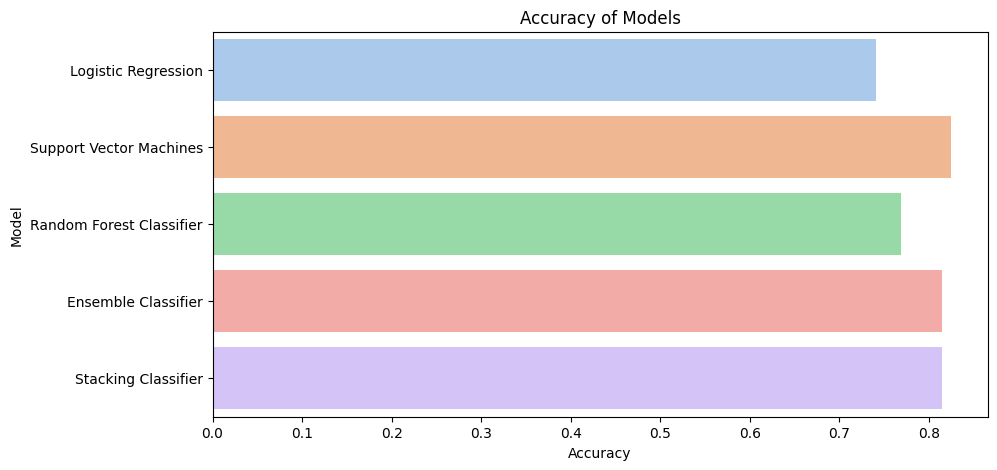

In [83]:
various=["Logistic Regression","Support Vector Machines","Random Forest Classifier","Ensemble Classifier","Stacking Classifier"]
plt.figure(figsize = (10,5))
plt.title("Accuracy of Models")
plt.xlabel("Accuracy")
plt.ylabel("Model")
sns.barplot(x = predicted, y = various, palette='pastel')

#Summary:<br>

the Support Vector Machines (SVM) model had the highest accuracy on the test dataset, closely followed by the ensemble classifier and the stacking classifier. The logistic regression and random forest classifier had lower but still moderate accuracy levels.